## Implement a shallow neural network from scratch
##### In this notebook, we will implement a shallow neural network with one hidden layer (Shwon in the figure below) . We will compare the performance of the neural network with a linear model.

<center>
<div style="max-width:600px">
<img src="model.jpg" >
</div>
</center>

In [2]:
### Import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [3]:
### Define a function to generate a random dataset
def load_datasets():
    X1, y1 = sklearn.datasets.make_gaussian_quantiles(
      cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1)
    X2, y2 = sklearn.datasets.make_gaussian_quantiles(
      mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1)

    X = np.concatenate((X1, X2))
    y = np.concatenate((y1, -y2 + 1))

    return X , y

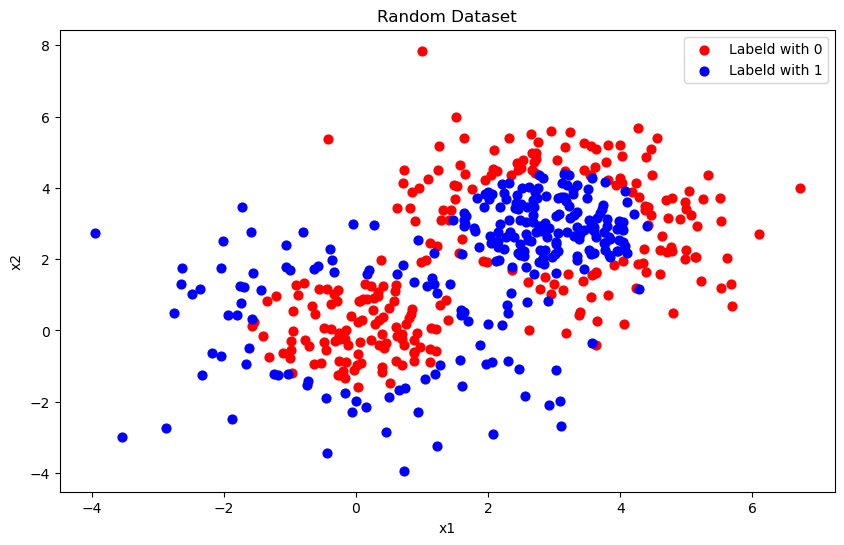

In [4]:
### Generate a random dataset
X , y = load_datasets()

### Data Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X[np.where(y == 0), 0], X[np.where(y == 0), 1], c='red', s=40, label='Labeld with 0')
plt.scatter(X[np.where(y == 1), 0], X[np.where(y == 1), 1], c='blue', s=40, label='Labeld with 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc="upper right")
plt.title('Random Dataset')
plt.show()

In [5]:
from sklearn.linear_model import LogisticRegressionCV

### Train a linear classifier (Logistic Regression)
clf = LogisticRegressionCV(random_state=42)
clf.fit(X, y)

LogisticRegressionCV(random_state=42)

In [6]:
from sklearn.inspection import DecisionBoundaryDisplay

### Define a function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    plt.figure(figsize=(10, 5))

    ax = plt.subplot(121)
    disp = DecisionBoundaryDisplay.from_estimator(
        model,
        X,
        cmap=plt.cm.Paired,
        response_method="predict",
        ax=ax,
        xlabel="x",
        ylabel="y")
    
    x_min, x_max = disp.xx0.min(), disp.xx0.max()
    y_min, y_max = disp.xx1.min(), disp.xx1.max()

    plt.axis("tight")

    for i, n, c in zip(range(2), "AB", "br"):
      idx = np.where(y == i)
      plt.scatter(
          X[idx, 0],
          X[idx, 1],
          c=c,
          cmap=plt.cm.Paired,
          s=20,
          edgecolor="k",
          label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc="upper right")
    plt.title("Decision Boundary")

/tmp/ipykernel_19571/568908161.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


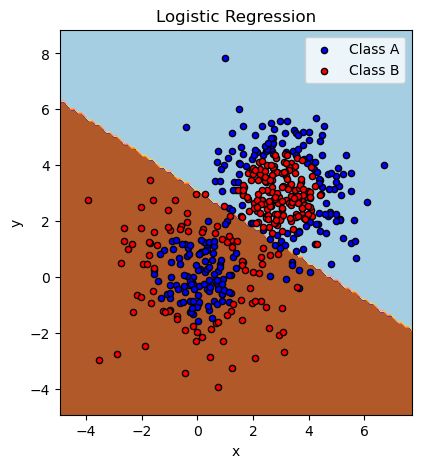

In [7]:
### Plot the decision boundary
plot_decision_boundary(clf, X, y)
plt.title("Logistic Regression")
plt.show()

In [8]:
### Report the accuracy of the classifier
print("Accuracy of Logistic Regression: %f" % clf.score(X, y))

Accuracy of Logistic Regression: 0.448000


In [9]:
### Define neural network structure
n_x = X.shape[1] # Number of input
n_h = 4 # Number of neurons in hidden layer
n_y = np.unique(y).shape[0] - 1 # Number of output neurons

In [10]:
# Define a function to initialize parameters
def initialize_parameters(n_x, n_h, n_y):
    
    np.random.seed(0)

    # Initialize W1, b1, W2, b2
    W1 = np.random.normal(0, np.sqrt(0.01), (n_h, n_x))
    b1 = np.zeros((n_h, 1))
    W2 = np.random.normal(0, np.sqrt(0.01), (n_y, n_h))
    b2 = np.zeros((n_y, 1))

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
    }

    return parameters

In [11]:
### Initialize parameters
parameters = initialize_parameters(n_x, n_h, n_y)

### Promt the parameters
for key, value in parameters.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

W1 (4, 2)
[[ 0.17640523  0.04001572]
 [ 0.0978738   0.22408932]
 [ 0.1867558  -0.09772779]
 [ 0.09500884 -0.01513572]]
------------------------------------------------------------
b1 (4, 1)
[[0.]
 [0.]
 [0.]
 [0.]]
------------------------------------------------------------
W2 (1, 4)
[[-0.01032189  0.04105985  0.01440436  0.14542735]]
------------------------------------------------------------
b2 (1, 1)
[[0.]]
------------------------------------------------------------


#### Forward Propagation:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}$$
$$a^{[1] (i)} = \tanh(z^{[1] (i)})$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})$$
$$ \sigma (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-x} }  $$

In [12]:
### Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Make sure that the function works correctly: should output array([[0.5]])
sigmoid(np.array([[0.]]))

array([[0.5]])

In [13]:
### Define a function for forward propagation
def forward_propagation(X, parameters):
    
    Z1 = parameters['W1'] @ X.T + parameters['b1']
    A1 = np.tanh(Z1)
    Z2 = parameters['W2'] @ A1 + parameters['b2']
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [14]:
### Rune forward propagation to test it
A2, cache = forward_propagation(X, parameters)

for key, value in cache.items():
    print(key, value.shape)

Z1 (4, 500)
A1 (4, 500)
Z2 (1, 500)
A2 (1, 500)


#### Cost function:
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right)$$

In [15]:
### Define a function to compute the cost
def compute_cost(A2, Y, parameters):
    m = Y.shape[0]
    cost = -1/m * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return cost

### Test the function
print("cost = " + str(compute_cost(A2, y, parameters)))

cost = 0.6931841227196894


#### ‌Backpropagation:
$$dz^{[2]} =  a^{[2]} - y$$
$$dW^{[2]} = dz^{[2]}a^{[1]^{T}}$$
$$db^{[2]} = dz^{[2]}$$
$$dz^{[1]} = W^{[2]^{T}}dz^{[2]}* g^{[1]'}(z^{[1]})$$
$$dW^{[1]} = dz^{[1]}X$$
$$db^{[1]} = dz^{[1]}$$

In [16]:
### Define a function for backward propagation
def backward_propagation(parameters, cache, X, Y):

    m = X.shape[0]
    dz2 = cache['A2'] - Y
    dW2 = 1/m * (dz2 @ cache['A1'].T)
    db2 = 1/m * np.sum(dz2, axis = 1, keepdims = True) 
    dz1 = (parameters['W2'].T @ dz2) * (1 - cache['A1'] ** 2)
    dW1 = 1/m * (dz1 @ X)
    db1 = 1/m * np.sum(dz1, axis = 1, keepdims = True) 

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2,
    }

    return grads

In [17]:
### Run the function to test it
grads = backward_propagation(parameters, cache, X, y)

for key, value in grads.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

dW1 (4, 2)
[[ 2.64909955e-04 -4.05260520e-06]
 [-3.99249329e-04 -1.72741034e-03]
 [-1.99840207e-04  2.60391692e-04]
 [ 2.73274316e-03  4.72875228e-03]]
------------------------------------------------------------
db1 (4, 1)
[[-8.19742911e-05]
 [ 5.15135545e-04]
 [ 1.25108457e-04]
 [ 1.19343101e-03]]
------------------------------------------------------------
dW2 (1, 4)
[[0.00318701 0.00015572 0.00081037 0.00275434]]
------------------------------------------------------------
db2 (1, 1)
[[0.00954825]]
------------------------------------------------------------


#### Update parameters:
$$W^{[1]} = W^{[1]} - learningRate * dW^{[1]}$$
$$b^{[1]} = b^{[1]} - learningRate * db^{[1]}$$
$$W^{[2]} = W^{[2]} - learningRate * dW^{[2]}$$
$$b^{[2]} = b^{[2]} - learningRate * db^{[2]}$$


In [18]:
### Define a function to update parameters
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters['W1'] - learning_rate * grads['dW1']
    b1 = parameters['b1'] - learning_rate * grads['db1']
    W2 = parameters['W2'] - learning_rate * grads['dW2']
    b2 = parameters['b2'] - learning_rate * grads['db2']

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
    }

    return parameters

In [19]:
### Run the function to test it
parameters = update_parameters(parameters, grads, 1.2)

for key, value in parameters.items():
    print(key, value.shape)
    print(value)
    print('-' * 60)

W1 (4, 2)
[[ 0.17608734  0.04002058]
 [ 0.0983529   0.22616221]
 [ 0.18699561 -0.09804026]
 [ 0.09172955 -0.02081022]]
------------------------------------------------------------
b1 (4, 1)
[[ 9.83691493e-05]
 [-6.18162654e-04]
 [-1.50130149e-04]
 [-1.43211721e-03]]
------------------------------------------------------------
W2 (1, 4)
[[-0.0141463   0.04087299  0.01343191  0.14212214]]
------------------------------------------------------------
b2 (1, 1)
[[-0.0114579]]
------------------------------------------------------------


#### Train the model

In [20]:
### Define a function to train the model
def nn_model(X, Y, learning_rate, num_iterations = 10000):
        
    # Set the network details like the number of input, hidden and output neurons
    n_x = X.shape[1] # Number of input
    n_h = 4 # Number of neurons in hidden layer + one bias neuron
    n_y = np.unique(Y).shape[0] - 1 # Number of output neurons
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Compute cost
        cost = compute_cost(A2, y, parameters)
            
        # Backward propagation
        grads = backward_propagation(parameters, cache, X, y)
        
        # Update parameters (using gradient descent)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 iterations
        if i % 1000 == 0:
            print(f'Cost after iteration {i}: {cost:.4f}')
            
    return parameters

#### Prediction:
$$ y^{(i)}_{prediction} = \begin{cases} 1 & \text{if } a^{[2](i)} > 0.5 \\ 0 & \text{otherwise } \end{cases} $$

In [21]:
def predict(parameters, X):
    A2, _ = forward_propagation(X, parameters)    
    predictions = np.where(A2 > 0.5, 1, 0)
    return predictions

In [22]:
### Run the model for 150000 iterations
parameters = nn_model(X, y, learning_rate = 0.1 , num_iterations = 150000)

Cost after iteration 0: 0.6932
Cost after iteration 1000: 0.6026
Cost after iteration 2000: 0.4380
Cost after iteration 3000: 0.3726
Cost after iteration 4000: 0.3312
Cost after iteration 5000: 0.3182
Cost after iteration 6000: 0.3124
Cost after iteration 7000: 0.3092
Cost after iteration 8000: 0.3073
Cost after iteration 9000: 0.3060
Cost after iteration 10000: 0.3052
Cost after iteration 11000: 0.3045
Cost after iteration 12000: 0.3041
Cost after iteration 13000: 0.3037
Cost after iteration 14000: 0.3034
Cost after iteration 15000: 0.3032
Cost after iteration 16000: 0.3030
Cost after iteration 17000: 0.3028
Cost after iteration 18000: 0.3027
Cost after iteration 19000: 0.3025
Cost after iteration 20000: 0.3024
Cost after iteration 21000: 0.3023
Cost after iteration 22000: 0.3022
Cost after iteration 23000: 0.3021
Cost after iteration 24000: 0.3020
Cost after iteration 25000: 0.3019
Cost after iteration 26000: 0.3019
Cost after iteration 27000: 0.3018
Cost after iteration 28000: 0.301

In [23]:
### Define a function to plot the decision boundary for neural network
def plot_decision_boundary_for_nn(model, X, y):

    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

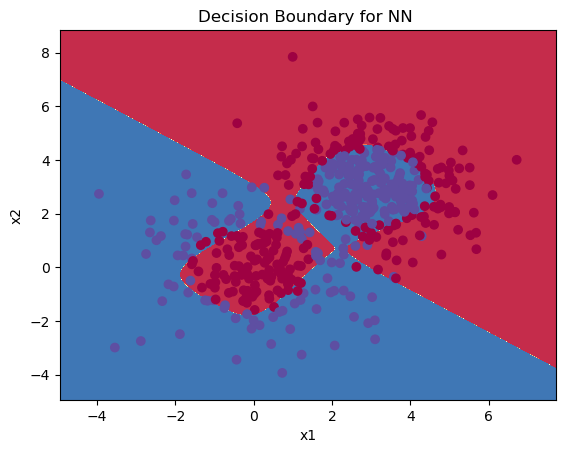

In [24]:
### Plot the decision boundary for neural network
plot_decision_boundary_for_nn(lambda x: predict(parameters, x), X.T, y.T)
plt.title("Decision Boundary for NN ");

In [25]:
from sklearn.metrics import accuracy_score

### Report the accuracy
y_hat = predict(parameters, X)
print(f'Accuracy: {accuracy_score(y, y_hat.flatten()) * 100}%')

Accuracy: 87.4%


#### Conclusion:
1) The neural network model outperforms (87.4% vs 44.8%) the linear classifier (Logistic Regression).
2) The neural network model can learn non-linear decision boundaries.